In [83]:
import pandas as pd
import numpy as np
import gzip
import json

pd.set_option('display.max_columns', None)

def parse(path):
  g = open('Data/' + path, 'r')
  for l in g:
    yield json.loads(l)

def parse_first_n(path, n=10000):
    g = open('Data/' + path, 'r')
    for i, l in enumerate(g):
        if i >= n:
            break
        yield json.loads(l)




In [64]:
texas_metadata = pd.DataFrame(parse("meta-Texas.json"))
texas_reviews = pd.DataFrame(parse_first_n("review-Texas.json", n=1000000))

In [65]:
texas_reviews.head()


,user_id,name,time,rating,text,pics,resp,gmap_id
0,117660620017716077111,Jason “Jayway”,1609270072631,5.0,Great and clean and very well mannerisms,None,None,0x8638869e6b4e3529:0xe8d257447fe41672
1,108991048262705869218,Beejal S.,1452441095667,5.0,"Clean facilities (bathrooms / store / pumps), ...",None,None,0x8638869e6b4e3529:0xe8d257447fe41672
2,114559474816876245528,Jennifer Moore,1504740883990,5.0,None,None,None,0x8638869e6b4e3529:0xe8d257447fe41672
3,117243547986845088566,Doris Brucken,1595037430155,4.0,None,None,None,0x8638869e6b4e3529:0xe8d257447fe41672
4,105673564666699552444,RICK SWANK,1562686087188,5.0,Gold star Transportation was a great place to ...,None,None,0x864c3748dcc1c12d:0xbf904a61f262cf9b


In [66]:
texas_metadata.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",0x8638869e6b4e3529:0xe8d257447fe41672,None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
1,Goldstar Transit,"Goldstar Transit, 4415 W Dickson Ln, Little El...",0x864c3748dcc1c12d:0xbf904a61f262cf9b,None,33.159363,-96.975571,[Transportation service],4.5,4,None,"[[Thursday, 6AM–6PM], [Friday, 6AM–6PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x864c374855555555:0x3abb669a098bb235, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...
2,Walmart Pharmacy,"Walmart Pharmacy, 12220 FM 423, Frisco, TX 75033",0x864c3998b8d8dc83:0x57ffabe1e2322320,None,33.179867,-96.883691,"[Pharmacy, Drug store, Medical supply store, V...",3.3,24,$,"[[Thursday, 9AM–9PM], [Friday, 9AM–9PM], [Satu...","{'Service options': ['Curbside pickup', 'In-st...",Open ⋅ Closes 9PM,"[0x864c3999b29e291f:0x2d364c05e88eec13, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...
3,Luminous Logistics,"Luminous Logistics, 3838 W Miller Rd, Garland,...",0x864ea0993bffffff:0xb50b5bb2fccf9d9b,None,32.893678,-96.688611,[Delivery service],2.3,8,None,None,None,None,"[0x864ea09938bb619f:0x1b6902de2a2f3f96, 0x864e...",https://www.google.com/maps/place//data=!4m2!3...
4,Pacesetter Personnel Services,"Pacesetter Personnel Services, 2300 Valley Vie...",0x864e819d99a1ff99:0xeee31cc82854286c,None,32.839795,-97.020987,[Employment agency],2.1,7,None,None,None,None,"[0x864e9d6ea0c9089f:0x6f90f8b0b092af49, 0x864e...",https://www.google.com/maps/place//data=!4m2!3...


In [67]:
(texas_reviews.shape[0] - texas_reviews['user_id'].unique().shape[0]) / texas_reviews.shape[0] #less repeat

0.156983

In [68]:
texas_reviews.groupby('user_id').count().sort_values(by='name', ascending=False).head(10)

,name,time,rating,text,pics,resp,gmap_id
user_id,,,,,,,
108961844797544374233,84,84,84,80,0,0,84
108973179366153285961,63,63,63,53,0,5,63
107804532983162220398,50,50,50,50,49,0,50
108236566166190114222,46,46,46,15,1,3,46
107381198803730986646,36,36,36,2,0,1,36
107228328187777373321,36,36,36,18,1,1,36
108298174296070052064,35,35,35,35,0,1,35
108963137270649477900,31,31,31,2,0,8,31
101631569466903582646,31,31,31,17,8,6,31


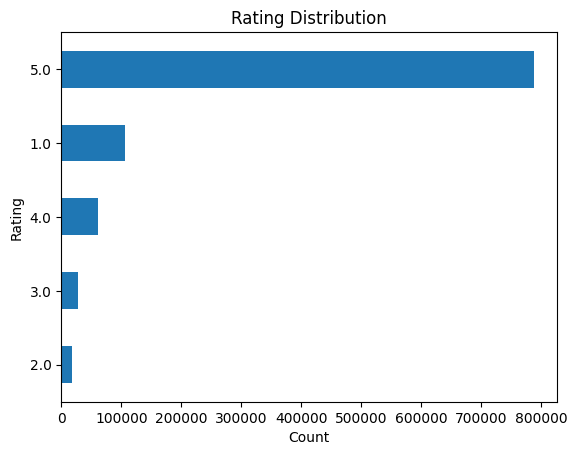

In [69]:
texas_reviews['rating'].value_counts().sort_values(ascending=True).plot(kind = 'barh', title='Rating Distribution', xlabel='Count', ylabel='Rating');

TEXAS doesnt have all of the data but so far these 1 star teviews are nearly double the 1 star. **DEFINETELY COULD BE A BIAS**

However metadata should be the same

In [70]:
(texas_metadata.shape[0] - texas_metadata['name'].unique().shape[0]) / texas_metadata.shape[0] #More repeats, 27%

0.2739619148964709

In [71]:
texas_metadata['name'].value_counts().sort_values(ascending=False).head(10)

name
Subway            2030
Dollar General    1655
Exxon             1549
Shell             1372
McDonald's        1200
Starbucks         1185
Family Dollar     1067
Valero            1029
Sonic Drive-In     970
T-Mobile           795
Name: count, dtype: int64

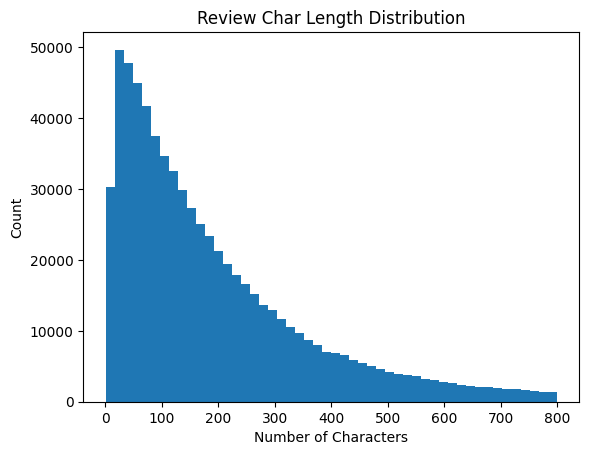

In [72]:
number_of_chars = texas_reviews['text'].apply(lambda x: len(x) if isinstance(x, str) and len(x) < 800 else None)
number_of_chars.plot(kind='hist', bins=50, title='Review Char Length Distribution', xlabel='Number of Characters', ylabel='Count');

In [73]:
np.percentile(number_of_chars.dropna(), 50)


np.float64(140.0)

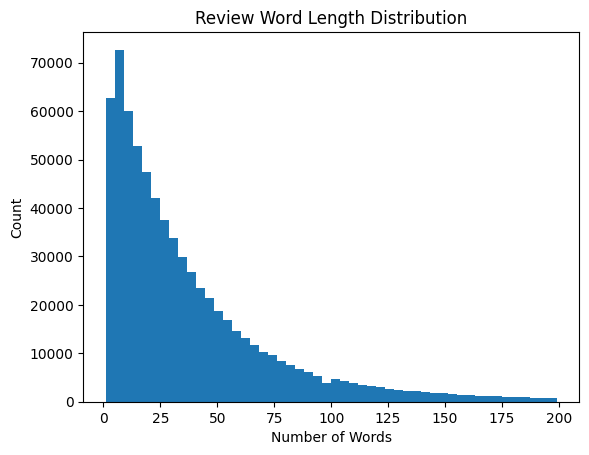

In [74]:
number_of_words = texas_reviews['text'].apply(lambda x: len(x.split()) if isinstance(x, str) and len(x.split()) < 200 else None)
number_of_words.plot(kind='hist', bins=50, title='Review Word Length Distribution', xlabel='Number of Words', ylabel='Count');

In [75]:
np.percentile(number_of_words.dropna(), 50) 

np.float64(25.0)

Texans write longer reviews, Have more chains/repeats, and SEEMS MUCH LESS PEOPLE REWRITE REVIEWS. However the longer rev and rewrites could be sampling error

In [76]:
texas_reviews.shape

(1000000, 8)

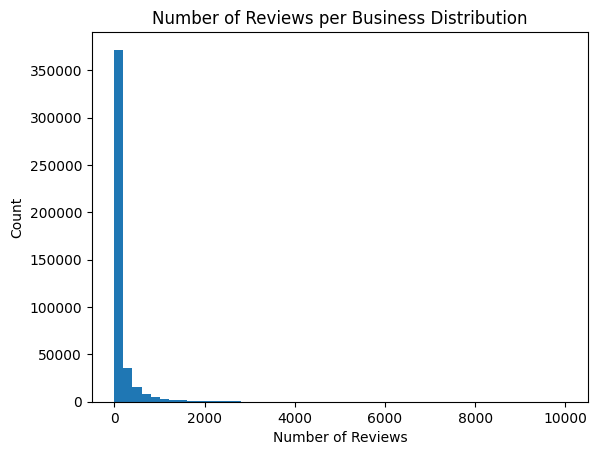

In [77]:
texas_metadata['num_of_reviews'].plot(kind='hist', bins=50, title='Number of Reviews per Business Distribution', xlabel='Number of Reviews', ylabel='Count');

In [78]:
(texas_metadata['gmap_id'].dropna().shape[0] - texas_metadata['gmap_id'].dropna().unique().shape[0]) /texas_metadata.shape[0]

0.005284878184004972

0.5 % of geompap IDs are repeated, HOW TO HANDLE THIS?


In [79]:
texas_metadata = texas_metadata.dropna(subset=['gmap_id']).drop_duplicates(subset=['gmap_id'], keep='first')

In [81]:
texas_merged = pd.merge(texas_reviews, texas_metadata, on = 'gmap_id', how='inner')

In [ ]:
texas_merged #name col needs to be renamed

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,117660620017716077111,Jason “Jayway”,1609270072631,5.0,Great and clean and very well mannerisms,None,None,0x8638869e6b4e3529:0xe8d257447fe41672,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
1,108991048262705869218,Beejal S.,1452441095667,5.0,"Clean facilities (bathrooms / store / pumps), ...",None,None,0x8638869e6b4e3529:0xe8d257447fe41672,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
2,114559474816876245528,Jennifer Moore,1504740883990,5.0,None,None,None,0x8638869e6b4e3529:0xe8d257447fe41672,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
3,117243547986845088566,Doris Brucken,1595037430155,4.0,None,None,None,0x8638869e6b4e3529:0xe8d257447fe41672,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
4,105673564666699552444,RICK SWANK,1562686087188,5.0,Gold star Transportation was a great place to ...,None,None,0x864c3748dcc1c12d:0xbf904a61f262cf9b,Goldstar Transit,"Goldstar Transit, 4415 W Dickson Ln, Little El...",None,33.159363,-96.975571,[Transportation service],4.5,4,None,"[[Thursday, 6AM–6PM], [Friday, 6AM–6PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x864c374855555555:0x3abb669a098bb235, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,103038745309192206338,Riyazali Umatiya,1558471772628,1.0,None,None,None,0x8646813f87824399:0x41db45db94dbf2c3,Ruffino Meats & Food Services,"Ruffino Meats & Food Services, 2130 E William ...",None,30.672425,-96.341592,[Meat wholesaler],4.5,33,None,"[[Friday, 7AM–4PM], [Saturday, 7AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 4PM,"[0x864683d7a6b00021:0x3cdcd4e45c3c82a, 0x86468...",https://www.google.com/maps/place//data=!4m2!3...
999996,103590580446661133505,Tina Vanderwater,1540521771052,3.0,None,None,None,0x8646813f87824399:0x41db45db94dbf2c3,Ruffino Meats & Food Services,"Ruffino Meats & Food Services, 2130 E William ...",None,30.672425,-96.341592,[Meat wholesaler],4.5,33,None,"[[Friday, 7AM–4PM], [Saturday, 7AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 4PM,"[0x864683d7a6b00021:0x3cdcd4e45c3c82a, 0x86468...",https://www.google.com/maps/place//data=!4m2!3...
999997,103382831829531864671,benny koshy,1577999494016,5.0,None,None,None,0x8646813f87824399:0x41db45db94dbf2c3,Ruffino Meats & Food Services,"Ruffino Meats & Food Services, 2130 E William ...",None,30.672425,-96.341592,[Meat wholesaler],4.5,33,None,"[[Friday, 7AM–4PM], [Saturday, 7AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Cl

In [ ]:
texas_metadata['gmap_id'].unique().shape[0] - texas_merged['gmap_id'].unique().shape[0]

444950

(-200.0, 0.0)

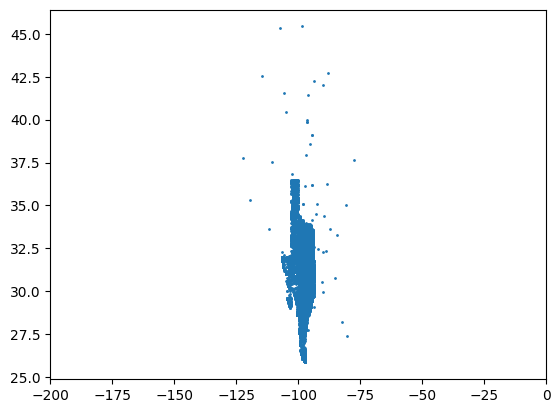

In [ ]:
import matplotlib.pyplot as plt
plt.plot(texas_metadata['longitude'], texas_metadata['latitude'], 'o', markersize=1)
plt.xlim([-200, 0])

(-200.0, 0.0)

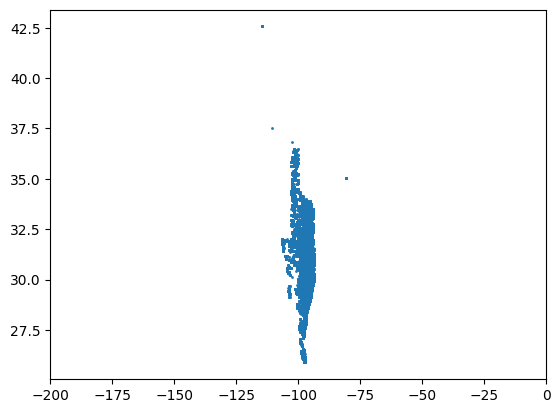

In [95]:
plt.plot(texas_merged['longitude'], texas_merged['latitude'], 'o', markersize=1)
plt.xlim([-200, 0])

Texas
Traditional abbreviation	Tex.
Latitude	25°50′ N to 36°30′ N
Longitude	93°31′ W to 106°39′ W
Website	texas.gov
